<a href="https://colab.research.google.com/github/glima91/mestrado-redes-neurais/blob/main/Atividade_6_MLP_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from abc import ABC, abstractstaticmethod
from scipy.special import expit
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.preprocessing import label_binarize
import numpy as np
from tensorflow import keras

## Cria funções de plot

In [10]:
def plotdataset(X,y):
  plt.xlabel('X1')
  plt.ylabel('X2')
  for k in set(y):
    plt.plot(X[:,0][y == k],X[:,1][y==k],'o',alpha=0.3)

def plothiperplano(X,y,vetor,intercept=0):
  X0min = min(X[:,0])
  X0max = max(X[:,0])
  xs = np.linspace(X0min,X0max,num = 2)
  ys = (-vetor[0]/vetor[1]) * xs-intercept/vetor[1]
  plt.plot(xs,ys)

def define_axes(X):
  margin = 0.2
  min1,max1 = X[:,0].min(),X[:,0].max()
  min2,max2 = X[:,1].min(),X[:,1].max()
  return [min1 - margin,max1 + margin,min2 - margin,max2 + margin]


def plotPredictions(clf,X):
  axes = define_axes(X)
  x0s = np.linspace(axes[0],axes[1],100)
  x1s = np.linspace(axes[2],axes[3],100)
  x0,x1 = np.meshgrid(x0s,x1s)
  X = np.c_[x0.ravel(),x1.ravel()]
  ypred = clf.predict(X).reshape(x0.shape)
  plt.contourf(x0,x1,ypred,cmap=plt.cm.brg,alpha = 0.2)

## Cria Dataset

In [11]:
# Cria dataset Blobs
def criaDatasetBlobs(n=1000, n_classes=4):
  X, y = make_blobs(n_samples=n, centers=n_classes, center_box=(0,1.0), cluster_std=0.02)
  return X, y 

# Criação do dataset XOR
def criaDatasetXor(n=1000):
  X, y = make_blobs(n_samples=n, centers=[[0,0], [1,0],[1,1],[0,1]], cluster_std=0.03)
  y = np.array(y%2, dtype=int)
  return X, y

In [12]:
X, y = criaDatasetBlobs(n=2000, n_classes=4)

Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=.9)

## Modelagem

In [13]:
class MLP(BaseEstimator, ClassifierMixin):
    """
    Versão do MLP com várias camadas ocultas usando Keras.
    """
    def __init__(self, max_iter=1000, n_hidden=[5], activation='relu'):
        self.max_iter = max_iter
        self.n_hidden = n_hidden
        self.activation = activation

    def fit(self, X, y):
        self.labels, ids = np.unique(y, return_inverse=True)
        yhot = keras.utils.to_categorical(ids)

        self.model = keras.models.Sequential()
        self.model.add(keras.layers.InputLayer(input_shape=(X.shape[1],)))

        for h in self.n_hidden:
            self.model.add(keras.layers.Dense(h,activation=self.activation))

        self.model.add(keras.layers.Dense(yhot.shape[1],activation='softmax'))

        self.model.compile(loss='categorical_crossentropy')
        self.model.fit(X, yhot, epochs=self.max_iter, verbose=0)

    def predict_proba(self, X, y=None):
        return self.model.predict(X)
    
    def predict(self, X, y=None):
        predictions = self.model.predict(X)
        return self.labels[np.argmax(predictions,axis=1)]
        


In [14]:
# Configuração e treinamento do modelo
model = MLP(n_hidden=[5,4], activation='relu')
model.fit(Xtr, ytr)
print(model.model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 5)                 15        
                                                                 
 dense_4 (Dense)             (None, 4)                 24        
                                                                 
 dense_5 (Dense)             (None, 4)                 20        
                                                                 
Total params: 59
Trainable params: 59
Non-trainable params: 0
_________________________________________________________________
None


Train acc= 1.0
Test acc= 1.0


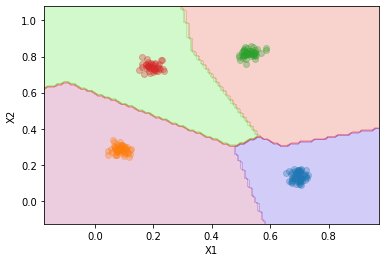

In [15]:
# Avaliação do modelo e plotagens
ypred = model.predict(Xtr,ytr)
print("Train acc=", sum(ytr == ypred)/len(ytr))

ypred = model.predict(Xte,yte)
print("Test acc=",sum(yte== ypred)/len(yte))

plotdataset(Xtr,ytr)
plotPredictions(model,Xte)